**LIMPIEZA DE DATOS CON PYTHON Y PANDAS**

**1. El problema del negocio**<br>
Como núcleo familiar, la familia Miranda, ha decidido crear un pequeño archivo de
presupuesto en el que administrará los principales gastos del hogar.  Existen otros tres archivos de gastos, uno por cada miembro de
la familia.

**2. El set de datos**<br>
La información recolectada es un presupuesto familiar se encuentra en un archivo EXCEL (gastos.xlsx) con 56 filas y 5 columnas.

Cada registro contiene 5 característica. Las columnas son:

-"fecha"<br>
-"flujo casa mes"<br>
-"valor"<br>
-"Forma de Pago"<br>
-"idCategoria"<br>

**3. Una primera mirada al dataset**

In [155]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [156]:
# Pandas setup
pd.options.display.max_columns
pd.set_option('display.max_columns', None)

In [157]:
# Selecciona la ruta del directorio actual
current_path=os.getcwd()

# Selecciona la ruta del directorio padre
parent_directory = os.path.split(current_path)[0]

# Selecciona la ruta del directorio de trabajo
folder_path=os.path.join(parent_directory, "bronze_stage")

nombre_del_archivo="Sales_Dataset_Input.csv"

# Leer archivo de texto con pandas uniendo la ruta del directorio de trabajo y el nombre del archivo
df = pd.read_csv(os.path.join(folder_path, nombre_del_archivo), sep=";", encoding='UTF-8')

In [158]:
print(df.shape)
df.head()

(94610, 9)


,num_documento_cliente,tipo_documento_cliente,codigo_tienda,total_compra,tipo_tienda,latitud_tienda,longitud_tienda,id_barrio,nombre_barrio
0,6.861790e+18,1,14812028,22218042.0,Tienda especializada,340.211.808,-7.652.568.134,737998244,Canaverales Los Samanes
1,1.552970e+18,1,14388938,21583407.0,Tienda especializada,3.468.765.417,-7.648.493.586,737998896,Jorge Eliecer Gaitan
2,-4.075900e+18,1,12370698,6185349.0,Tienda especializada,340.074.292,-7.652.483.946,737998244,Canaverales Los Samanes
3,3.539340e+18,1,10313583,10313583.0,Tienda especializada,3.369.543.673,-7.652.366.403,738000400,Lili
4,5.595550e+18,1,14358071,28716142.0,Tienda especializada,3.419.045.741,-7.649.772.993,737996734,El Poblado


In [159]:
# Veamos las variables categóricas y las numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94610 entries, 0 to 94609
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_documento_cliente   94610 non-null  float64
 1   tipo_documento_cliente  94610 non-null  int64  
 2   codigo_tienda           94610 non-null  int64  
 3   total_compra            94610 non-null  float64
 4   tipo_tienda             94610 non-null  object 
 5   latitud_tienda          94610 non-null  object 
 6   longitud_tienda         94610 non-null  object 
 7   id_barrio               94610 non-null  int64  
 8   nombre_barrio           94610 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 6.5+ MB


**4. Limpieza**<br>
Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas


**4.1 Datos faltantes**<br>
Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.<br>
El número total de registros debería ser 56. Sin embargo columnas como "valor", "idCategoria"<br>
Por ser tan pocos los datos faltantes optaremos por eliminar las filas correspondientes:

In [160]:
def insert_comma(number, n):
    number_str = str(number)
    return number_str[:n] + '.' + number_str[n:]

In [161]:
df['num_documento_cliente'] = abs(df['num_documento_cliente'])
df['nombre_barrio'] = df['nombre_barrio'].str.capitalize()

df['latitud_tienda'] = df['latitud_tienda'].str.replace(".", "")
df['longitud_tienda'] = df['longitud_tienda'].str.replace(".", "")
df['latitud_tienda'] = df['latitud_tienda'].str.strip()
df['longitud_tienda'] = df['longitud_tienda'].str.strip()

df['latitud_tienda'] = df['latitud_tienda'].apply(lambda x: insert_comma(x, 1))
df['longitud_tienda'] = df['longitud_tienda'].apply(lambda x: insert_comma(x, 3))


In [162]:
df.head()

,num_documento_cliente,tipo_documento_cliente,codigo_tienda,total_compra,tipo_tienda,latitud_tienda,longitud_tienda,id_barrio,nombre_barrio
0,6.861790e+18,1,14812028,22218042.0,Tienda especializada,3.40211808,-76.52568134,737998244,Canaverales los samanes
1,1.552970e+18,1,14388938,21583407.0,Tienda especializada,3.468765417,-76.48493586,737998896,Jorge eliecer gaitan
2,4.075900e+18,1,12370698,6185349.0,Tienda especializada,3.40074292,-76.52483946,737998244,Canaverales los samanes
3,3.539340e+18,1,10313583,10313583.0,Tienda especializada,3.369543673,-76.52366403,738000400,Lili
4,5.595550e+18,1,14358071,28716142.0,Tienda especializada,3.419045741,-76.49772993,737996734,El poblado


In [163]:
df.dropna(inplace=True)
cols_str = ['num_documento_cliente', 'tipo_documento_cliente', 'codigo_tienda', 'tipo_tienda', 'latitud_tienda', 'longitud_tienda', 'id_barrio', 'nombre_barrio']

for col in cols_str:
    df[col] = df[col].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94610 entries, 0 to 94609
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_documento_cliente   94610 non-null  object 
 1   tipo_documento_cliente  94610 non-null  object 
 2   codigo_tienda           94610 non-null  object 
 3   total_compra            94610 non-null  float64
 4   tipo_tienda             94610 non-null  object 
 5   latitud_tienda          94610 non-null  object 
 6   longitud_tienda         94610 non-null  object 
 7   id_barrio               94610 non-null  object 
 8   nombre_barrio           94610 non-null  object 
dtypes: float64(1), object(8)
memory usage: 6.5+ MB


**4.2 Columnas irrelevantes**<br>
Una columna irrelevante puede ser:

Una columna que no contiene información relevante para el problema que queremos resolver. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)<br>
- Una columna categórica pero con un sólo nivel. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".<br>
- Una columna numérica pero con un sólo valor. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.<br>
- Columnas con información redundante. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.<br>

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [164]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['tipo_documento_cliente', 'tipo_tienda', 'nombre_barrio']

for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna tipo_documento_cliente: 5 subniveles
Columna tipo_tienda: 6 subniveles
Columna nombre_barrio: 277 subniveles


Verifiquemos lo que ocurre con las columnas numéricas:

In [165]:
df.describe()

,total_compra
count,9.461000e+04
mean,1.642113e+08
std,1.357421e+09
min,3.000000e+01
25%,2.568500e+03
50%,2.043000e+04
75%,7.370069e+06
max,1.232100e+11


La columna numérica tiene desviacion estándar ("std") diferente de cero

**4.3 Filas repetidas**

In [166]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (94610, 9)
Tamaño del set después de eliminar las filas repetidas: (94579, 9)


**4.4 *Outliers* en las variables numéricas**

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.<br>
Creemos gráficas tipo "boxplot" de las columnas numéricas:

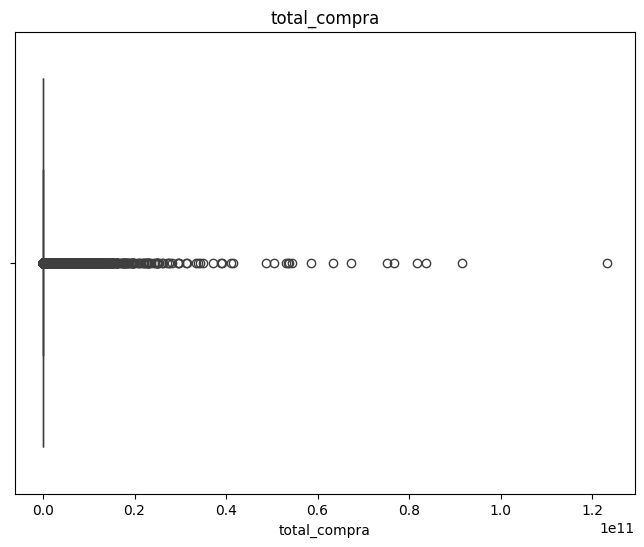

In [167]:
# Crear el boxplot
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la gráfica
sns.boxplot(x="total_compra", data=df)

# Agregar un título y etiquetas a los ejes
plt.title("total_compra")
plt.xlabel("total_compra")
plt.ylabel("")

# Mostrar la gráfica
plt.show()

**4.5 Errores tipográficos en variables categóricas**

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.Se deben unificar estos sub-niveles. Eliminar espacios o parentesis del nombre de las columnas

In [168]:
nuevos_nombres_de_columnas = ['documento_cliente', 'tipo_documento', 'codigo_tienda', 'total_compra', 'tipo_tienda', 'latitud_tienda', 'longitud_tienda', 'id_barrio', 'nombre_barrio']
df.columns = nuevos_nombres_de_columnas

C:\Users\SERGIO\AppData\Local\Temp\ipykernel_32080\1476414403.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
C:\Users\SERGIO\AppData\Local\Temp\ipykernel_32080\1476414403.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
C:\Users\SERGIO\AppData\Local\Temp\ipykernel_32080\1476414403.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)


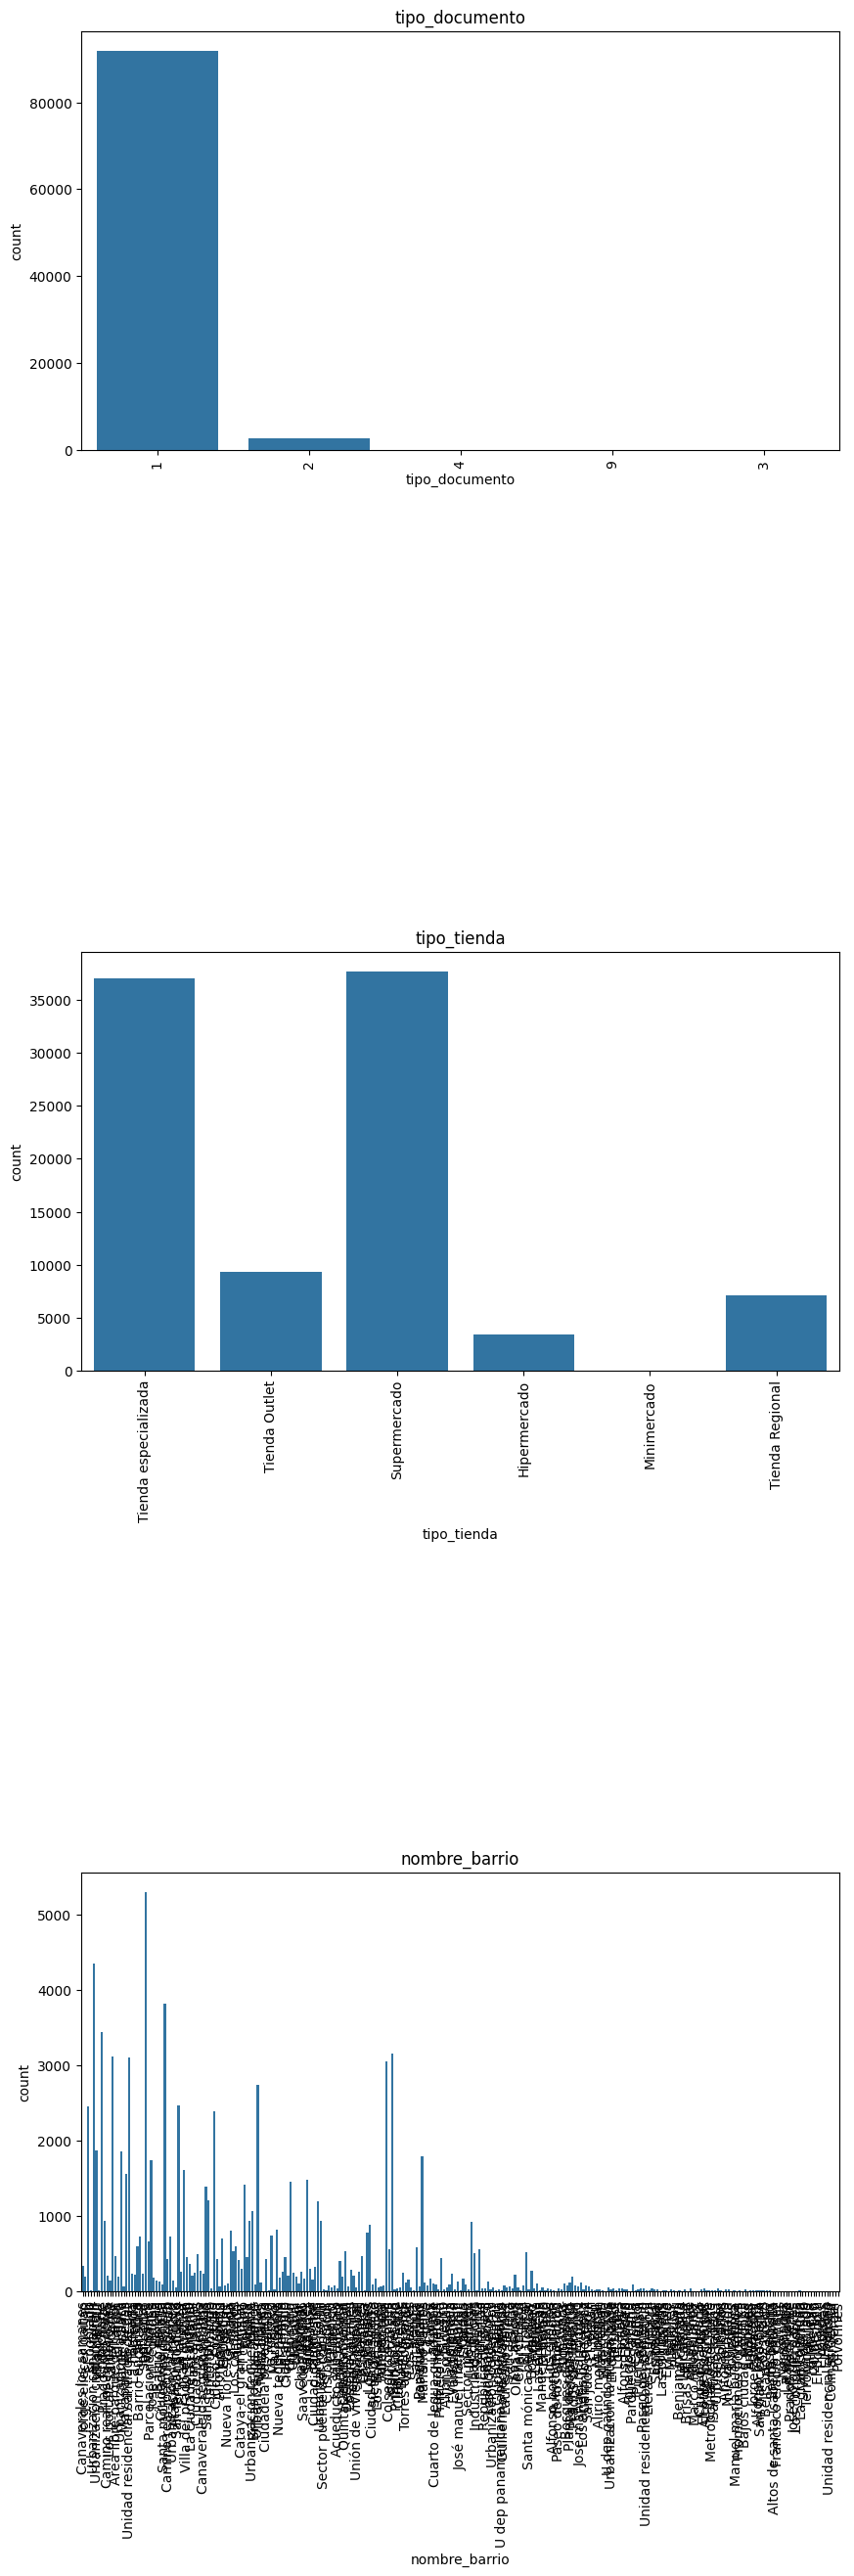

In [169]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['tipo_documento', 'tipo_tienda', 'nombre_barrio']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1.2)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

In [170]:
ruta_estado_plata = os.path.join(parent_directory, "silver_stage")
ruta_excel_plata = os.path.join(ruta_estado_plata, "sales_dataset_clean.xlsx")

df.to_excel(ruta_excel_plata,index=False)

**Gerenación de datos**

In [171]:
diccionario_valores = {
    '1': 'Cedula de ciudadanía',
    '2': 'Cedula de extranjería',
    '3': 'Colombianos en el exterior',
    '4': 'Certificados excepcionales de la cédula de ciudadanía',
    '9': 'Concepción de identidad de los indígenas JIW'
}

df['nombre_documento'] = df['tipo_documento'].replace(diccionario_valores)
df.head()

,documento_cliente,tipo_documento,codigo_tienda,total_compra,tipo_tienda,latitud_tienda,longitud_tienda,id_barrio,nombre_barrio,nombre_documento
0,6.86179e+18,1,14812028,22218042.0,Tienda especializada,3.40211808,-76.52568134,737998244,Canaverales los samanes,Cedula de ciudadanía
1,1.55297e+18,1,14388938,21583407.0,Tienda especializada,3.468765417,-76.48493586,737998896,Jorge eliecer gaitan,Cedula de ciudadanía
2,4.0759e+18,1,12370698,6185349.0,Tienda especializada,3.40074292,-76.52483946,737998244,Canaverales los samanes,Cedula de ciudadanía
3,3.53934e+18,1,10313583,10313583.0,Tienda especializada,3.369543673,-76.52366403,738000400,Lili,Cedula de ciudadanía
4,5.59555e+18,1,14358071,28716142.0,Tienda especializada,3.419045741,-76.49772993,737996734,El poblado,Cedula de ciudadanía


In [172]:
# Convertir la columna 'latitud_tienda' y 'longitud_tienda' a tipo float
df['latitud_tienda'] = df['latitud_tienda'].astype(float)
df['longitud_tienda'] = df['longitud_tienda'].astype(float)
# Obtener información sobre los tipos de datos en 'latitud_tienda'
info_tipos_datos = df['latitud_tienda'].apply(type).value_counts()
print("Información sobre los tipos de datos en 'latitud_tienda':")
print(info_tipos_datos)

# Obtener información sobre los tipos de datos en 'longitud_tienda'
info_tipos_datos1 = df['longitud_tienda'].apply(type).value_counts()
print("Información sobre los tipos de datos en 'longitud_tienda':")
print(info_tipos_datos1)

Información sobre los tipos de datos en 'latitud_tienda':
latitud_tienda
<class 'float'>    94579
Name: count, dtype: int64
Información sobre los tipos de datos en 'longitud_tienda':
longitud_tienda
<class 'float'>    94579
Name: count, dtype: int64


In [173]:
print(df['latitud_tienda'].dtype)
print(df['longitud_tienda'].dtype)

float64
float64


In [174]:
from geopy.distance import geodesic
# Posición de referencia
posicion_referencia = (6.2585893390556, -75.56258916485564)

# Calcular la distancia para cada fila en el DataFrame
df['distancia_a_referencia'] = df.apply(lambda row: geodesic(posicion_referencia, (row['latitud_tienda'], row['longitud_tienda'])).kilometers, axis=1)

# Imprimir el DataFrame con la nueva columna de distancia
df['distancia_a_referencia']


0        333.448764
1        325.023898
2        333.562958
3        336.792762
4        330.690308
            ...    
94605    325.608991
94606    332.973875
94607    328.573344
94608    329.876217
94609    328.841360
Name: distancia_a_referencia, Length: 94579, dtype: float64

In [182]:
# Obtener el tipo de la columna 'nombre_columna'
tipo_columna = df['documento_cliente'].dtype

print(f"Tipo de 'nombre_columna': {tipo_columna}")

Tipo de 'nombre_columna': object


In [176]:
# Obtener información sobre los tipos de datos en 'nombre_columna'
info_tipos_datos = df['distancia_a_referencia'].apply(type).value_counts()

print("Información sobre los tipos de datos en 'distancia_a_referencia':")
print(info_tipos_datos)

Información sobre los tipos de datos en 'distancia_a_referencia':
distancia_a_referencia
<class 'float'>    94579
Name: count, dtype: int64


In [179]:
# Selecciona la ruta del directorio padre
parent_directory = os.path.split(current_path)[0]

ruta_golden_stage = os.path.join(parent_directory, "golden_stage")
ruta_excel = os.path.join(ruta_golden_stage, "sales_dataset_golden.xlsx")

df.to_excel(ruta_excel,index=False)